In [59]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "average-time-spent-by-a-user-on-social-media"

# Library Import

In [60]:
library(dplyr)
library(ggplot2)
library(corrplot)

# **1. Data Import**

In [61]:
data <- read.csv('/kaggle/input/average-time-spent-by-a-user-on-social-media/dummy_data.csv', stringsAsFactors = F)

# 1-1. Data Structure

In [62]:
head(data)

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
2,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
3,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
4,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
5,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True
6,38,male,3,Facebook,Travel,United States,Urban,Marketer Manager,19179,True,True,True


In [63]:
summary(data)

      age           gender            time_spent      platform        
 Min.   :18.00   Length:1000        Min.   :1.000   Length:1000       
 1st Qu.:29.00   Class :character   1st Qu.:3.000   Class :character  
 Median :42.00   Mode  :character   Median :5.000   Mode  :character  
 Mean   :40.99                      Mean   :5.029                     
 3rd Qu.:52.00                      3rd Qu.:7.000                     
 Max.   :64.00                      Max.   :9.000                     
  interests           location         demographics        profession       
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                         

In [64]:
str(data)

'data.frame':	1000 obs. of  12 variables:
 $ age         : int  56 46 32 60 25 38 56 36 40 28 ...
 $ gender      : chr  "male" "female" "male" "non-binary" ...
 $ time_spent  : int  3 2 8 5 1 3 8 4 7 2 ...
 $ platform    : chr  "Instagram" "Facebook" "Instagram" "Instagram" ...
 $ interests   : chr  "Sports" "Travel" "Sports" "Travel" ...
 $ location    : chr  "United Kingdom" "United Kingdom" "Australia" "United Kingdom" ...
 $ demographics: chr  "Urban" "Urban" "Sub_Urban" "Urban" ...
 $ profession  : chr  "Software Engineer" "Student" "Marketer Manager" "Student" ...
 $ income      : int  19774 10564 13258 12500 14566 19179 16881 13636 16030 10223 ...
 $ indebt      : chr  "True" "True" "False" "False" ...
 $ isHomeOwner : chr  "False" "True" "False" "True" ...
 $ Owns_Car    : chr  "False" "True" "False" "False" ...


***Check missing value***

In [65]:
sum(is.na(data))

[1] 0

# 1-2. Data Preprocessing

In [66]:
##############################################################################
#  Change character variables to factor variables for correlation analysis   #
#  Change demographics Rural -> 0 , Sub_Urban -> 1 , Urban -> 2              #
#  Change indebt, isHomeOwner, Owns_car False -> 0, True -> 1                #
##############################################################################

data$demographics <- ifelse(data$demographics == 'Rural',0,
                           ifelse(data$demographics == 'Sub_Urban',1,
                               ifelse(data$demographics == 'Urban',2,3)))

data$indebt <- ifelse(data$indebt == 'False',0,
                     ifelse(data$indebt == 'True',1,3))

data$isHomeOwner <- ifelse(data$isHomeOwner == 'False',0,
                     ifelse(data$isHomeOwner == 'True',1,3))

data$Owns_Car <- ifelse(data$Owns_Car == 'False',0,
                     ifelse(data$Owns_Car == 'True',1,3))

In [67]:
# Change character variables to factor variables

data$platform <- as.factor(data$platform)
data$gender <- as.factor(data$gender)
data$location <- as.factor(data$location)
data$interests <- as.factor(data$interests)
data$profession <- as.factor(data$profession)
data$demographics <- as.factor(data$demographics)
data$indebt <- as.factor(data$indebt)
data$isHomeOwner <- as.factor(data$isHomeOwner)
data$Owns_Car <- as.factor(data$Owns_Car)

In [68]:
summary(data)

      age               gender      time_spent         platform  
 Min.   :18.00   female    :331   Min.   :1.000   Facebook :307  
 1st Qu.:29.00   male      :337   1st Qu.:3.000   Instagram:363  
 Median :42.00   non-binary:332   Median :5.000   YouTube  :330  
 Mean   :40.99                    Mean   :5.029                  
 3rd Qu.:52.00                    3rd Qu.:7.000                  
 Max.   :64.00                    Max.   :9.000                  
     interests             location   demographics             profession 
 Lifestlye:341   Australia     :352   0:340        Marketer Manager :355  
 Sports   :331   United Kingdom:329   1:335        Software Engineer:336  
 Travel   :328   United States :319   2:325        Student          :309  
                                                                          
                                                                          
                                                                          
     income  

# 1-3. Data Relationship

***Correlation***

In [69]:
cor(data[,c("age","time_spent","income")]) # pearson

,age,time_spent,income
age,1.00000000,-0.033826961,-0.087391476
time_spent,-0.03382696,1.000000000,0.004757252
income,-0.08739148,0.004757252,1.000000000


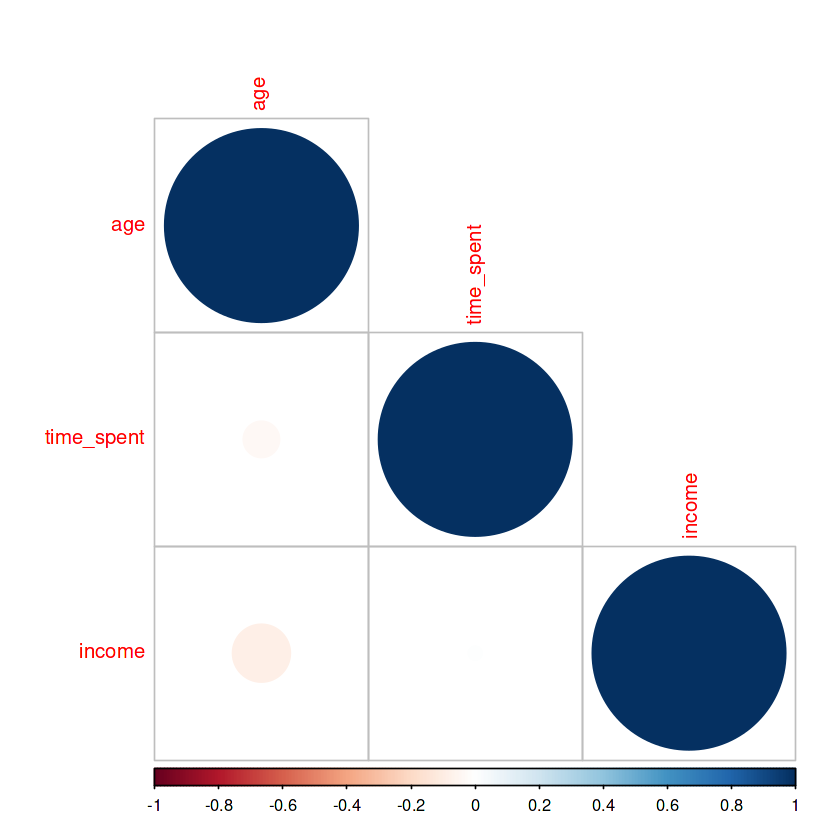

In [70]:
corrplot(cor(data[,c("age","time_spent","income")]),type = "lower")

**There is little correlation between variables.**

# 2. Exploring with Data Visualization

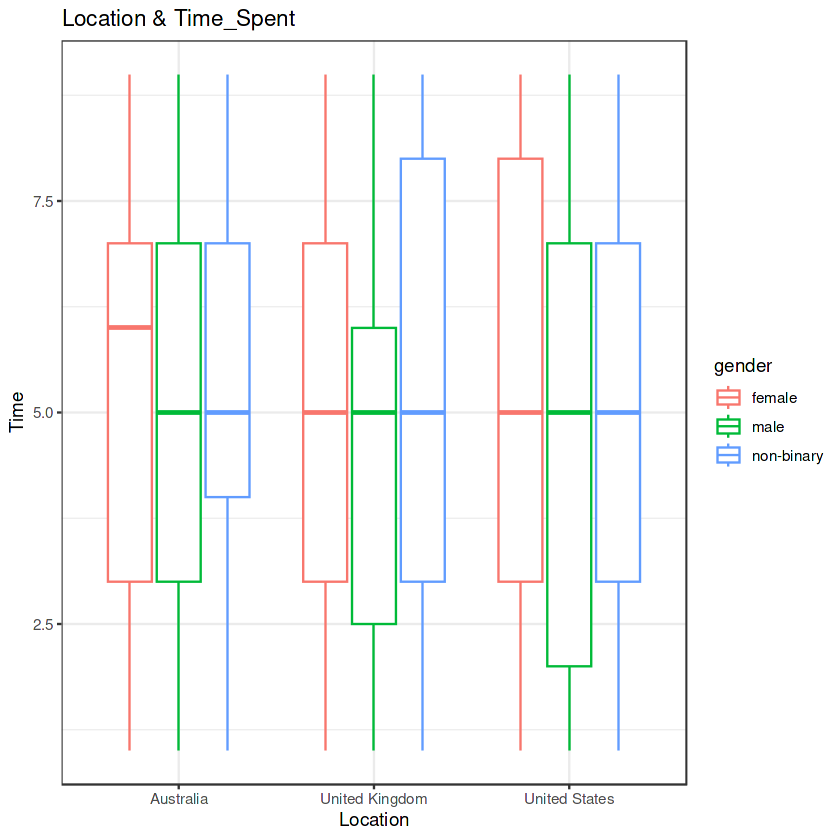

In [71]:
# Time_spent based on location and gender

ggplot(data, aes(x= location , y = time_spent , color = gender)) + 
    geom_boxplot() +
    xlab("Location") +
    ylab("Time") + 
    ggtitle("Location & Time_Spent")+
    theme_bw()


**There are some differences, but the distribution by location is almost the same**

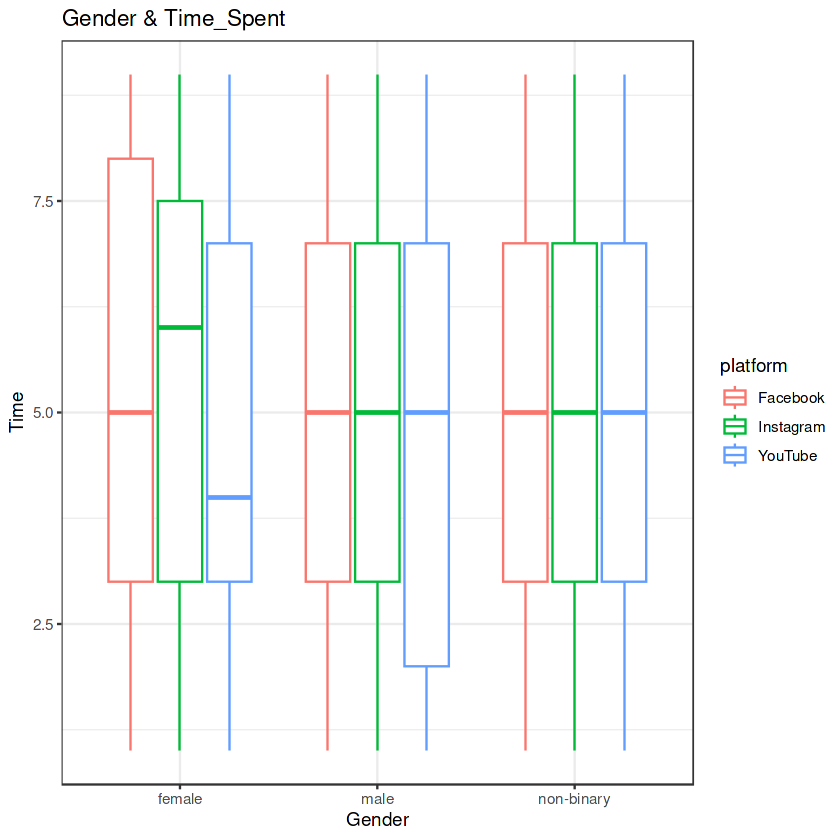

In [72]:
# Time_spent based on platform and gender

ggplot(data, aes(x= gender , y = time_spent , color = platform)) + 
    geom_boxplot() +
    xlab("Gender") +
    ylab("Time") + 
    ggtitle("Gender & Time_Spent")+
    theme_bw()

**Female used Instagram the most. Median value of box plot is the biggest.** \
**Femlae used YouTube the least. Median value of box plot is the smallest**

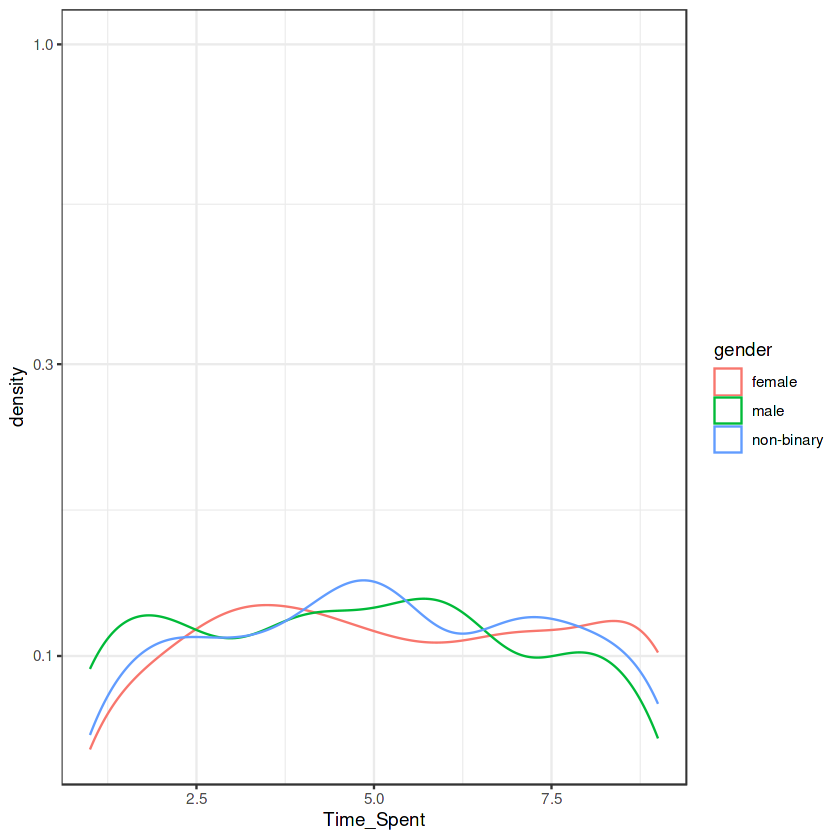

In [73]:
# Time_spent based on gender

ggplot(data, aes(x = time_spent, col = gender)) + 
    geom_density() +
    scale_y_log10() +
    xlab("Time_Spent") +
    theme_bw()

**Though slightly different, the distribution of usage time by gender is almost the same**

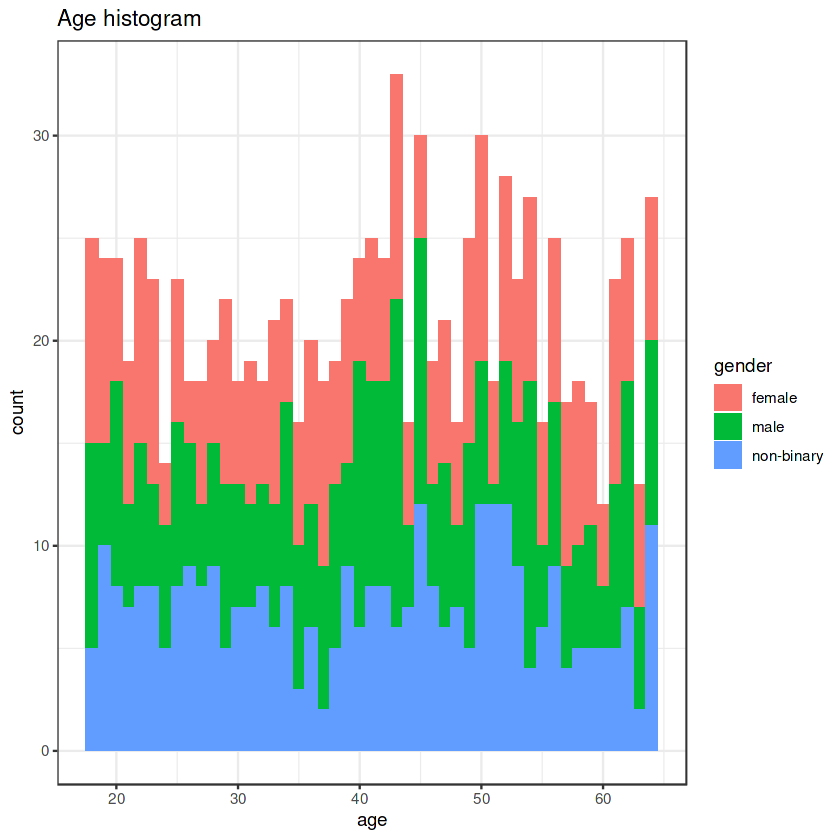

In [74]:
# Age histogram 
ggplot(data, aes(x=age,fill = gender)) + 
    geom_histogram(binwidth=1)+
    ggtitle("Age histogram") +
    theme_bw()

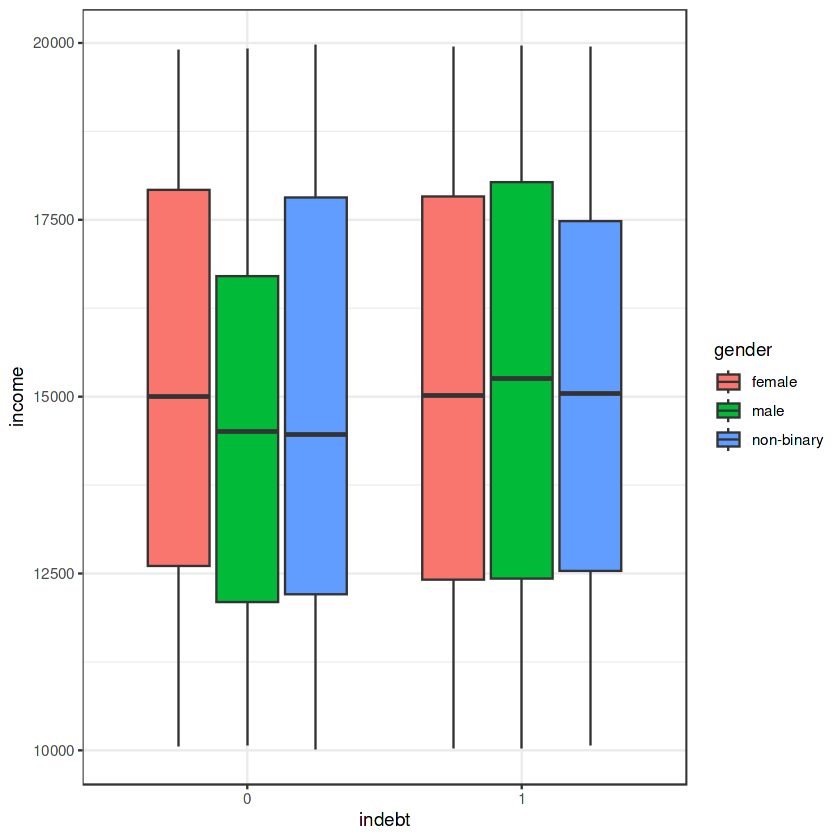

In [75]:
# Indebt true -> 1 false -> 0 

ggplot(data, aes(x = indebt, y = income, fill = gender)) +
    geom_boxplot() +
    theme_bw()

**People whose indebt is a '1' the income is a little higher**

# 3. Exploratory Data Analysis

In [76]:
data %>% group_by(gender,platform) %>%
             summarize(N=n(), avg_time = round(mean(time_spent, na.rm=T),2)) %>%
                filter(N > 100)

`summarise()` has grouped output by 'gender'. You can override using the
`.groups` argument.


gender,platform,N,avg_time
<fct>,<fct>,<int>,<dbl>
female,Instagram,135,5.31
female,YouTube,111,4.86
male,Facebook,113,4.99
male,Instagram,128,4.87
non-binary,Facebook,109,4.83
non-binary,YouTube,123,5.11


* **Female use Instagram the most, and the average usage time is 5.31 hours.**
* **Male use Instagram the most, and the average usage time is 4.87 hours.** 
* **Non-binary use YouTube the most, and the average usage time is 5.11 hours.**

#      **The group with the most average social media usage time is Female.**

In [77]:
gender_income <- data %>% group_by(gender) %>%
            summarize(N = n(), avg_income = round(mean(income,na.rm=T),2))
gender_income

gender,N,avg_income
<fct>,<int>,<dbl>
female,331,15185.77
male,337,14919.62
non-binary,332,14941.03


* **The average wage for Female is 15185.77(in dollars)**
* **The average wage for Male is 14919.62 (in dollars)**
* **The average wage for Non-binary is 14941.03 (in dollars)**

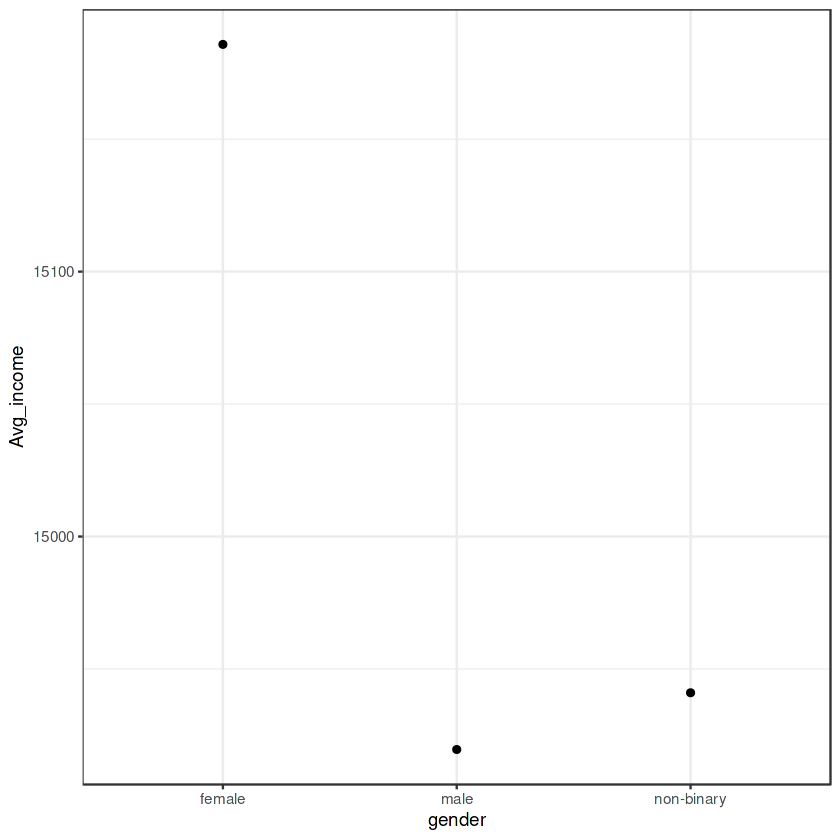

In [87]:
ggplot(gender_income, aes(x=gender,y=avg_income))+
    geom_point()+
    ylab("Avg_income")+
    theme_bw()

# **The group with the highest average income is Female.**

In [94]:
data %>% group_by(interests) %>%
            summarize(N = n(), avg_income = round(mean(income,na.rm=T),2)) %>%
                filter(interests == 'Lifestlye' )

data %>% group_by(interests) %>%
            summarize(N = n(), avg_income = round(mean(income,na.rm=T),2)) %>%
                filter(interests == 'Sports' )

data %>% group_by(interests) %>%
            summarize(N = n(), avg_income = round(mean(income,na.rm=T),2)) %>%
                 filter(interests == 'Travel' )

interests,N,avg_income
<fct>,<int>,<dbl>
Lifestlye,341,15113.56


interests,N,avg_income
<fct>,<int>,<dbl>
Sports,331,14975.73


interests,N,avg_income
<fct>,<int>,<dbl>
Travel,328,14951.62


* **The average wage for people whose main area of interest is lifestyle is 15113.56 (in dollars)**
* **The average wage for people whose main area of interest is Sports is 14975.73 (in dollars)**
* **The average wage for people whose main area of interest is Travel is 14951.62 (in dollars)**
# **The group whose main area of interest is lifestyle has the highest average wage.**

In [109]:
data %>% group_by(isHomeOwner) %>%
            summarize(N = n(), avg_income = round(mean(income,na.rm=T),2))

data %>% group_by(Owns_Car) %>%
            summarize(N = n(), avg_income = round(mean(income,na.rm=T),2))

data %>% group_by(indebt) %>%
            summarize(N = n(), avg_income = round(mean(income,na.rm=T),2))


isHomeOwner,N,avg_income
<fct>,<int>,<dbl>
0,492,14996.58
1,508,15032.49


Owns_Car,N,avg_income
<fct>,<int>,<dbl>
0,461,14951.55
1,539,15068.94


indebt,N,avg_income
<fct>,<int>,<dbl>
0,503,14903.53
1,497,15127.45


**There is little difference in average wages for each group.**
# **IsHomeOwner, Owns_Car, and Indebt cannot distinguish the difference in average wages.**

In [91]:
data %>% group_by(isHomeOwner) %>%
            summarize(N = n(), avg_time = round(mean(time_spent,na.rm=T),2))

data %>% group_by(Owns_Car) %>%
            summarize(N = n(), avg_time = round(mean(time_spent,na.rm=T),2))

data %>% group_by(indebt) %>%
            summarize(N = n(), avg_time = round(mean(time_spent,na.rm=T),2))

isHomeOwner,N,avg_time
<fct>,<int>,<dbl>
0,492,4.95
1,508,5.10


Owns_Car,N,avg_time
<fct>,<int>,<dbl>
0,461,5.08
1,539,4.98


indebt,N,avg_time
<fct>,<int>,<dbl>
0,503,5.00
1,497,5.06


**There is little difference in average usage time between groups.**
# **IsHomeOwner,Owns_Car,and Indebt cannot distinguish the difference in average usage time**

In [134]:
generation_time <- data
generation_time$generation <- ifelse(data$age <= 18, "Children",
                                    ifelse(data$age >18 & data$age <=60,"Adult",
                                        ifelse(data$age >60, "Old","Invalid")))


generation,N,mean_time
<chr>,<int>,<dbl>
Adult,887,5.05
Children,25,5.24
Old,88,4.75


In [124]:
head(generation_time)

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car,generation
,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<chr>
1,56,male,3,Instagram,Sports,United Kingdom,2,Software Engineer,19774,1,0,0,Adult
2,46,female,2,Facebook,Travel,United Kingdom,2,Student,10564,1,1,1,Adult
3,32,male,8,Instagram,Sports,Australia,1,Marketer Manager,13258,0,0,0,Adult
4,60,non-binary,5,Instagram,Travel,United Kingdom,2,Student,12500,0,1,0,Adult
5,25,male,1,Instagram,Lifestlye,Australia,2,Software Engineer,14566,0,1,1,Adult
6,38,male,3,Facebook,Travel,United States,2,Marketer Manager,19179,1,1,1,Adult


In [136]:
gt <- generation_time %>% group_by(generation) %>%
                        summarize(N = n(), mean_time = round(mean(time_spent,na.rm=T),2))

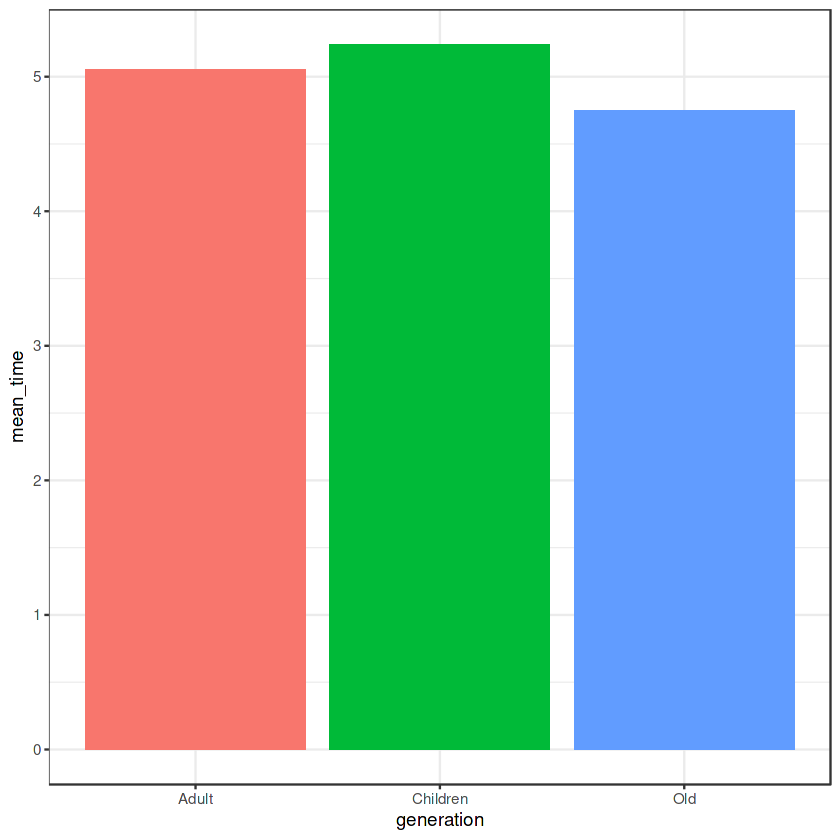

In [143]:
ggplot(gt, aes(x= generation, y = mean_time,fill = generation)) + 
    geom_col() +
    theme_bw() +
    theme(legend.position = "none")

# **There is no big difference between generations, but children spend the most time using social media.**